#                       Esercitazione 4 - 12 Marzo 2023

In [61]:
#dependecies
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
from functools import reduce
from funcanalitics import DomainCreator, FunctionEvaluator

Esplorate le caratteristiche dell'insieme dei numeri di macchina F($\beta$,t,L,U) sul vostro calcolatore utilizzando il comando sys.float_info, dopo aver importato im modulo sys:

import sys

print(sys.float_info)

In [51]:
print(sys.float_info)
L_2 = sys.float_info.min_exp - 1
U_2 = sys.float_info.max_exp - 1


sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)


min_exp=-1021   (L=-1021-1=-1022)

max_exp=1024    (U=1024-1=1023)

mant_dig=53 (incluso l'hidden bit)

dig=15, significa che i numeri "float" vengono convertiti in stringhe con un massimo di 15 cifre decimali. Le cifre decimali oltre la quindicesima vengono eliminate (troncate). (solo a livello di stringa visualizzata)

- **1.**  Calcolare lo spacing in  $[2^{52}, 2^{53}]$.
    - Sia $x=2^{52}$ individuare il numero successivo a $2^{52}$ ed assegnarlo ad una variabile  y.
    - Cosa succede se consideriamo il valore z=x+0.5?
    - Cosa succede se consideriamo il valore q=y+0.5?
  

In [23]:
BETA = 2.0
spacing = lambda p, t, beta: beta ** (p + 1 - t)

In [63]:
#1
x = BETA ** 52
y = x + spacing(52, 53, BETA)
z = x + 0.5
q = y + 0.5
print(f"spacing -> {spacing(low_exp, high_exp, BETA)}")
print(f"x = {x} (2^52)\ny = {y} (x + spacing(2^52,2^53))")
print(f"z = {z} (x + 1/2)\nq = {q} (y + 1/2)")

spacing -> 1.0
x = 4503599627370496.0 (2^52)
y = 4503599627370497.0 (x + spacing(2^52,2^53))
z = 4503599627370496.0 (x + 1/2)
q = 4503599627370498.0 (y + 1/2)


- **2** Calcolare la cardinalità dell'insieme dei numeri finiti di Python

In [64]:
#2
cardinalita = lambda beta, t, L, U: 2 * (beta-1) * beta**(t-1) + (U-L+1) + 1
print(cardinalita(BETA, sys.float_info.mant_dig, L_2, U_2))

9007199254743040.0


- **3**  Verificare numericamente che $\texttt{eps} = 2^{-52}$, spacing nell'intervallo $[1, 2]$,
è il piu' piccolo $x$ tale che $fl(1 + x)$ è  diverso da $1$. 


In [65]:
#3
eps = BETA ** -low_exp
sp = spacing(0, sys.float_info.mant_dig, BETA)
print(f"spacing: {sp}")
print(f"fl(x + 1): {(sp + 1)}")

spacing: 2.220446049250313e-16
fl(x + 1): 1.0000000000000002


- **4** Costruire un numpy array costituito da n=10 valori tutti uguali a 0.1
-     Effettuate la somma utilizzando un ciclo for.
-     Effettuate la somma effettuando la somma con la funzione sum del modulo numpy.
  Cosa osservate? Cercate di giustificare i risultati 

In [62]:
#4
n = 10
sum_loop = lambda arr, sum: reduce(lambda a,b: a + b, arr) 
sum_num_py = lambda arr: np.sum(arr)

arr = np.repeat(0.1, n)
print(f"sum loop = {sum_loop(arr, 0)} \nsum py {sum_num_py(arr)}")

sum loop = 0.9999999999999999 
sum py 1.0


- **5.** Siano $a=1.234567890123400 e+15$, $b=-1.234567890123401 e+15$, $c=0.06$. 
  Calcolare $(a+b)+c$, $(a+c)+b$, $a+(b+c)$. Che cosa si osserva? Ripetere l'esercizio con $a=0.23371258 e-4$, $b=0.33678429 e+2$, $c=-0.33677911 e+2$.

In [77]:
#5
scale = lambda m, exp, beta: m * beta / (beta ** exp)
normalize = lambda x, beta: x / beta 
exp = 16
a=1.234567890123400e+15
b=-1.234567890123401e+15
c=scale(6e-2, 15, 10)
c=0.06

ass1 = lambda a, b, c: (a + b) + c
print(ass1(a,b,c))
ass2 = lambda a, b, c: (a + c) + b
print(ass2(a,b,c))
ass3 = lambda a, b, c: a + (b + c)
print(ass3(a,b,c))

-0.94
-1.0
-1.0


- **6.** Si considerino le espressioni $y_1=\sqrt{x^2+1}-x$ e $y_2=\frac{1}{\sqrt{x^2+1}+x}$. Calcolare il valore di $y_1$ e $y_2$ per $x=7777$ e $x=77777777$. Che cosa si osserva? Commentare i risultati ottenuti.

In [80]:
#6
square = lambda x: np.sqrt(x**2 + 1)
y1 = lambda x: square(x) - x
y2 = lambda x: 1 / (square(x) + x)
x = 77777
print(f"x is {x}, y1: {y1(x)}, y2: {y2(x)}")
x = 77777777
print(f"x is {x}, y1: {y1(x)}, y2: {y2(x)}")

x is 77777, y1: 6.428628694266081e-06, y2: 6.428635714662899e-06
x is 77777777, y1: 0.0, y2: 6.428571492857143e-09


- **7.** Valutare in aritmetica floating point l'espressione
$$A(x)=\frac{1}{x}-\frac{1}{(x+1)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$,  Si calcoli per ogni elemento di x l'errore relativo considerando come valore esatto quello calcolato usando  l'espressione algebricamente equivalente
$$
B(x)=\frac{1}{x (x+1)}.
$$ Si visualizzi l'errore relativo in un grafico in scala logaritmica su $x$ e $y$

In [2]:
#7
A = lambda x: (1 / x) - (1 / (x + 1))
B = lambda x: 1 / (x * (x + 1))

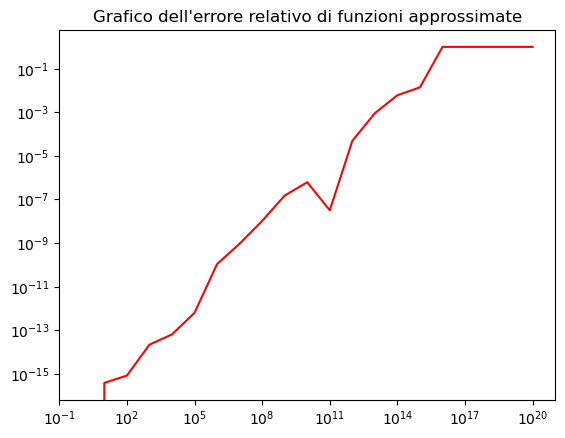

In [3]:
fc = DomainCreator((0,20), step=1)
fc.compute(lambda b: b ** fc.k)

eq = FunctionEvaluator(A, fc.n)
eq.plot_err(B(fc.n))

- **8-**  Risolvere l'equazione $x^2+10^k x+1=0$ con k in range(1,9). 

- Scrivere un codice Python che calcola le due radici: x1=(-b+sqrt(Delta))/2  e x2=(-b-sqrt(Delta))/2, dove Delta=b^2-4ac,  per tutti i valori di k in range(1,9)

- Calcolare l'errore relativo della soluzione numerica x1 rispetto alla soluzione in aritmetica reale, che per valori di k alti è  uguale a $10^{-k}$, altrimenti è una sua approssimazione. 

- Visualizzare l'errore relativo per ogni valore di k.

- Proporre un algoritmo aleternativo per il calcolo di una delle due soluzioni, che fornisca errore relativo inferiore.

In [4]:
#8
def delta_formula(b, a=1, c=1):
    delta=(b**2) - (4*a*c)
    return (-b+np.sqrt(delta))/2*a, (-b-np.sqrt(delta))/2*a

sum_solver = lambda b: -b - delta_formula(b)[1]
#formula is c / a / x2 but (c,a) are both 1 
prod_solver = lambda b: 1 / delta_formula(b)[1]  
delta_solver = lambda b: delta_formula(b)[0]
reals_x1 = lambda b, k: -(b ** -k)

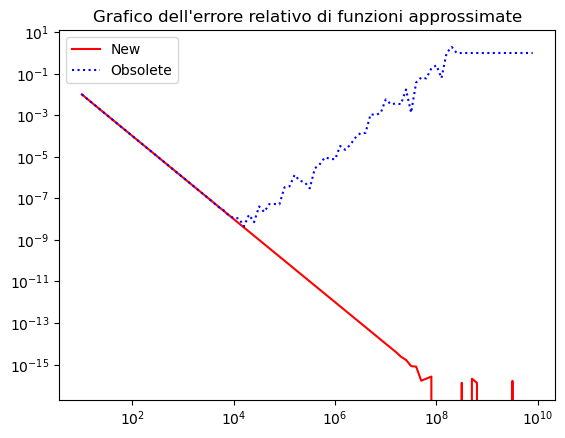

In [5]:
fc = DomainCreator((1,9), step=0.1)
fc.compute(lambda b: b ** fc.k)

eq = FunctionEvaluator(prod_solver, fc.n, obsolete=delta_solver)
eq.plot_err(reals_x1(fc.beta, fc.k), compare=True)

- **9.** Scrivere uno script Matlab che fornisca le approssimazioni di $e=\exp(1)$ ottenute con la formula
$f(n)=(1/n+1)^n$ per $n=10^k$ e  $k=0, ..., 16$. 

Visualizzare  un grafico con i valori di $f(n)$ al variare di n ed un grafico con i valori dell'errore relativo (considerando come valore esatto il valore math.exp(1)).  Cosa si osserva? Commentare i risultati ottenuti.

In [8]:
#9
euler_formula = lambda n: (1 / n + 1) ** n
real_exp = lambda n: np.repeat(math.exp(1), n)

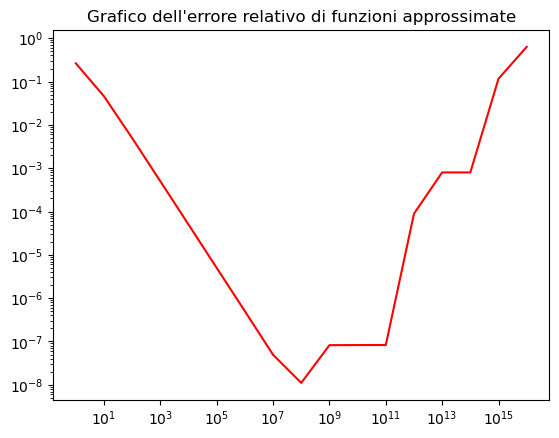

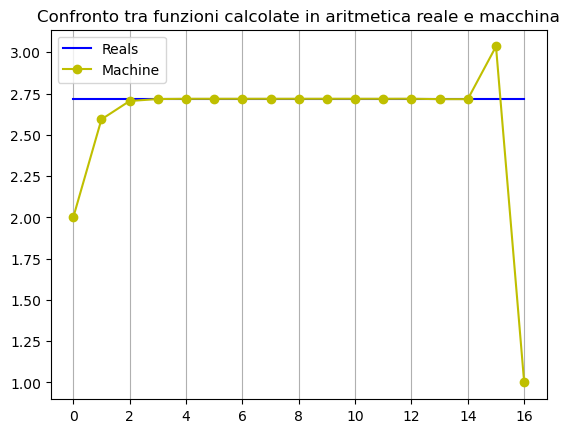

In [9]:
fc = DomainCreator((0,16))
fc.compute(lambda b: b**fc.k)
func_lim_dx = fc.k.shape[0]

eq = FunctionEvaluator(euler_formula, fc.n)
eq.plot_err(real_exp(func_lim_dx))

#plotting comparison
plt.grid(True, axis='x')
eq.plot_compares(fc.k)

Si osserva che dopo un certo k la funzione in arimetmica macchina produce un valore non rappresentabile